# Sprint 機械学習スクラッチ ロジスティック回帰

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#このSprintについて" data-toc-modified-id="このSprintについて-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>このSprintについて</a></span><ul class="toc-item"><li><span><a href="#Sprintの目的" data-toc-modified-id="Sprintの目的-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sprintの目的</a></span></li><li><span><a href="#どのように学ぶか" data-toc-modified-id="どのように学ぶか-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>どのように学ぶか</a></span></li></ul></li><li><span><a href="#ロジスティック回帰スクラッチ" data-toc-modified-id="ロジスティック回帰スクラッチ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ロジスティック回帰スクラッチ</a></span><ul class="toc-item"><li><span><a href="#【問題1】仮定関数" data-toc-modified-id="【問題1】仮定関数-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>【問題1】仮定関数</a></span></li><li><span><a href="#【問題2】最急降下法" data-toc-modified-id="【問題2】最急降下法-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>【問題2】最急降下法</a></span></li><li><span><a href="#【問題3】推定" data-toc-modified-id="【問題3】推定-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>【問題3】推定</a></span></li><li><span><a href="#【問題4】目的関数" data-toc-modified-id="【問題4】目的関数-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>【問題4】目的関数</a></span></li><li><span><a href="#【問題5】学習と推定" data-toc-modified-id="【問題5】学習と推定-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>【問題5】学習と推定</a></span></li><li><span><a href="#【問題6】学習曲線のプロット" data-toc-modified-id="【問題6】学習曲線のプロット-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>【問題6】学習曲線のプロット</a></span></li><li><span><a href="#【問題7】決定領域の可視化" data-toc-modified-id="【問題7】決定領域の可視化-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>【問題7】決定領域の可視化</a></span></li><li><span><a href="#【問題8】（アドバンス課題）重みの保存" data-toc-modified-id="【問題8】（アドバンス課題）重みの保存-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>【問題8】（アドバンス課題）重みの保存</a></span></li><li><span><a href="#おまけ" data-toc-modified-id="おまけ-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>おまけ</a></span></li></ul></li></ul></div>

## このSprintについて

### Sprintの目的

* スクラッチを通してロジスティック回帰を理解する
* 分類問題についての基礎を学ぶ

### どのように学ぶか
スクラッチでロジスティック回帰を実装した後、学習と検証を行なっていきます。

## ロジスティック回帰スクラッチ

ロジスティック回帰のクラスをスクラッチで作成していきます。  
NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

In [1423]:
# インポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1424]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter=100, lr=0.01, C=1,
                 random_state=None,bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.C = C
        self.lamda = 1/self.C
        self.random_state = random_state
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def _linear_combination(self,X):
        """
        線形結合する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, n_features+1)
          線形結合
        """
        x1 = X
        
        # x0（バイアス項）の作成
        if self.bias == True:
            x0 = np.ones(x1.shape[0])
        else:
            x0 = np.zeros(x1.shape[0])
        
        return np.concatenate([x0.reshape(-1,1),x1],axis=1)
        
        
    def _hypothetical_function(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        x = X
        z = np.dot(x,self.theta)
        
        return 1/(1+np.exp(-z))
    
    def _gradient_descent(self, X, error):
        """
        最急降下法により、θの値を更新し、学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        error : 真の値と推定した値の誤差
        """
        # 正則化（lamda）をi=1,2,・・・に加えるためのtmp
        self.tmp = np.append(0,np.ones(X.shape[1]-1))
        self.theta -= self.lr*(np.dot(error,X) + self.tmp*self.lamda*self.theta)/len(X)
        
        #self.theta -= self.lr*np.dot(error,X)/len(X)
        #self.theta[1:] -= self.lr*self.lamda*self.theta[1:]/len(X)
        
    def _loss_function(self, y, yhat):
        """
        ロジスティック回帰の損失関数を計算する。
        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        yhat : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        return np.mean(-y*np.log(yhat) -(1-y)*np.log(1-yhat))+0.5*self.lamda*np.mean(self.theta[1:]**2)
        
    def fit(self, X, y, X_val=False, y_val=False):
        """
        ロジスティック回帰を学習する。
        検証(valid)データが入力された場合は、
        それに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # yのラベル値を取得
        self.ylabel = np.unique(y)
        
        # yのラベル値を0,1に置換
        y = np.where(y==self.ylabel[0],0,1)
        
        if (type(y_val) != bool):
            y_val = np.where(y_val==self.ylabel[0],0,1)
        
        # 線形結合
        X = self._linear_combination(X)
        
        # パラメータθの初期値を乱数で与える
        np.random.seed(self.random_state)
        self.theta = np.random.rand(X.shape[1])
        
        for i in range(self.iter):
            # 予測確率
            yhat = self._hypothetical_function(X)
            
            # 誤差
            error = yhat - y            
            self.loss[i] = self._loss_function(y,yhat)
            
            if (type(X_val) != bool):
                val_X = self._linear_combination(X_val)
                val_yhat = self._hypothetical_function(val_X)
                
                self.val_loss[i] = self._loss_function(y_val,val_yhat)
            
            self._gradient_descent(X, error)
            
            # verboseをTrueにした際は学習過程を出力
            if self.verbose:
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
            
        # θを保存
        np.save('theta', self.theta)
        
            

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X = self._linear_combination(X)
        yhat = self._hypothetical_function(X)
        
        return np.where(yhat<0.5,self.ylabel[0],self.ylabel[1])
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X = self._linear_combination(X)
        
        return self._hypothetical_function(X)

### 【問題1】仮定関数

ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

ロジスティック回帰の仮定関数は、線形回帰の仮定関数をシグモイド関数に通したものです。  
シグモイド関数は以下の式で表されます。

In [1425]:
# 仮定関数　θx
x1 = np.arange(1,11,1).reshape(-1,1)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1],axis=1)
print('x:\n',x)

x:
 [[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]


In [1426]:
# パラメータ　θ
theta = np.random.randn(x.shape[1])
print('theta:\n',theta)

theta:
 [1.37103847 0.61363835]


In [1427]:
# 線形結合
z = np.dot(x,theta)
print('z:\n',z)

z:
 [1.98467682 2.59831516 3.21195351 3.82559186 4.43923021 5.05286856
 5.6665069  6.28014525 6.8937836  7.50742195]


In [1428]:
# シグモイド関数にzを代入 ・・・出力 0<y<1
y = 1/(1+np.exp(-z))
print('y:\n',y)

y:
 [0.87917883 0.93075307 0.96128164 0.97865981 0.98833271 0.99364961
 0.996552   0.99813037 0.99898696 0.99945131]


In [1429]:
# 試してみる
z1 = np.arange(-50,50,0.1)
y1 = 1/(1+np.exp(-z1))

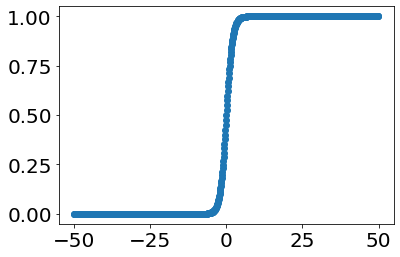

In [1430]:
plt.scatter(z1,y1)
plt.plot();

### 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。
以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、  
fitメソッドから呼び出すようにしてください。

In [1431]:
# パラメータ更新の実装前確認 予測値ラベル変換
x1 = np.array([2,1,5,6,4]).reshape(-1,1)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1],axis=1)

y = np.array([0.4,0.5,0.2,0.1,0.9])
yhat = np.where(y<0.5,0,1)
y_test = np.array([1,1,0,0,1])
print('x:\n',x)
print('y:\n',y)
print('yhat:\n',yhat)
print('ytest:\n',y_test)

x:
 [[1. 2.]
 [1. 1.]
 [1. 5.]
 [1. 6.]
 [1. 4.]]
y:
 [0.4 0.5 0.2 0.1 0.9]
yhat:
 [0 1 0 0 1]
ytest:
 [1 1 0 0 1]


In [1432]:
# パラメータ　θ
theta = np.random.randn(x.shape[1])
print('theta:\n',theta)

theta:
 [-0.97288458  0.31848572]


In [1433]:
# yhat,yの誤差
error = yhat - y_test
print('error:\n',error)

error:
 [-1  0  0  0  0]


In [1434]:
# lamda
lm = np.array([0,1])
theta*lm

array([-0.        ,  0.31848572])

In [1435]:
# パラメータの更新
0.01*np.dot(error,x)/len(x) + theta*lm/len(x)

array([-0.002     ,  0.05969714])

In [1436]:
theta -=  (0.01*np.dot(error,x)/len(x) + theta*lm/len(x))
print('theta:\n',theta)

theta:
 [-0.97088458  0.25878858]


In [1437]:
theta -=  (0.01*np.mean(np.dot(error,x)) + theta*lm/len(x))
theta

array([-0.95588458,  0.22203086])

### 【問題3】推定

In [1438]:
x1 = np.array([2,1,5,6,4]).reshape(-1,1)
x2 = np.array([2,1,5,2,4]).reshape(-1,1)
y = np.array([1,0,0,0,1])
print('x1:\n',x1)
print('x1:\n',x2)
print('y:\n',y)

x1:
 [[2]
 [1]
 [5]
 [6]
 [4]]
x1:
 [[2]
 [1]
 [5]
 [2]
 [4]]
y:
 [1 0 0 0 1]


In [1439]:
clf = ScratchLogisticRegression()
clf.fit(x1,y,x1,y)

y_proba = clf.predict_proba(x2)
y_pred = clf.predict(x2)

In [1440]:
print('y_proba:\n',y_proba)
print('y_pred:\n',y_pred)

y_proba:
 [0.43097605 0.46532201 0.33299389 0.43097605 0.36453371]
y_pred:
 [0 0 0 0 0]


### 【問題4】目的関数
以下の数式で表されるロジスティック回帰の目的関数（損失関数）を実装してください。  
そして、これをself.loss, self.val_lossに記録するようにしてください。

In [1441]:
# チェックデータ作成
y1 = np.ones(99)
y2 = np.zeros(99)
yh = np.arange(0.01,1.0,0.01)

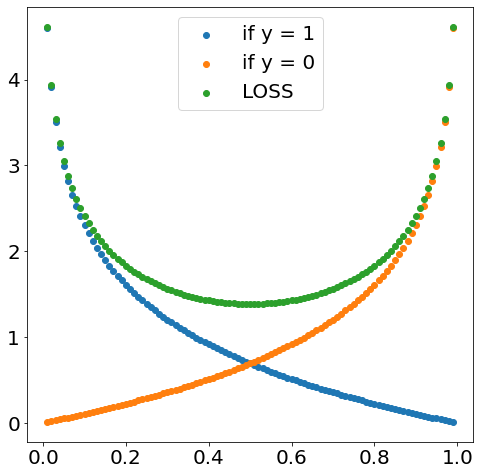

In [1442]:
# チェックデータで目的関数Jをイメージしてみる
J1 = -y1*np.log(yh)-(1-y1)*np.log(1-yh)
J2 = -y2*np.log(yh)-(1-y2)*np.log(1-yh)
J = -y1*np.log(yh)-(1-y2)*np.log(1-yh)

# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(8,8))

plt.rcParams["font.size"] = 20
plt.scatter(yh,J1,label='if y = 1')
plt.scatter(yh,J2,label='if y = 0')
plt.scatter(yh,J,label='LOSS')
plt.legend();

### 【問題5】学習と推定

機械学習スクラッチ入門のSprintで用意したirisデータセットの  
virgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。
  
scikit-learnによる実装と比べ、正しく動いているかを確認してください。  
  
AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [1443]:
from sklearn.datasets import load_iris
data = load_iris().data
target = load_iris().target.reshape(-1,1)

In [1444]:
import pandas as pd

iris = np.concatenate([data,target],axis=1)
iris = pd.DataFrame(iris)
iris.shape

(150, 5)

In [1445]:
disp = False
if disp == True:
    sns.pairplot(iris,palette='tab10');

In [1446]:
iris_X = iris.loc[iris[4]!=0,2:3].values
iris_y = iris.loc[iris[4]!=0,4].values
print('iris_X.shape:',iris_X.shape)
print('iris_y.shape:',iris_y.shape)

iris_X.shape: (100, 2)
iris_y.shape: (100,)


In [1447]:
# Irisデータセットで学習、推定
from sklearn.model_selection import train_test_split
X = iris_X
y = iris_y

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (80, 2)
y_train.shape: (80,)
X_valid.shape: (20, 2)
y_valid.shape: (20,)


In [1448]:
# yのユニーク値
np.unique(y)

array([1., 2.])

In [1449]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [1450]:
clf = ScratchLogisticRegression(num_iter=500, lr=0.01, C=0.01 ,verbose=False)
clf.fit(X_train_std,y_train,X_valid_std,y_valid)

y_pred = clf.predict(X_valid_std)
y_prob = clf.predict_proba(X_valid_std)

In [1451]:
y_valid

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1.])

In [1452]:
y_pred

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1.])

In [1453]:
y_prob

array([0.45730716, 0.65169636, 0.47857411, 0.67662277, 0.59797989,
       0.65798542, 0.45041019, 0.52138623, 0.63850869, 0.61209546,
       0.57047701, 0.54967152, 0.6118632 , 0.45028913, 0.30483588,
       0.34848961, 0.47857411, 0.40857057, 0.50699713, 0.4292444 ])

In [1454]:
# 評価指標
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.95
precision 1.0
recall 0.9
f1 0.9473684210526316


In [1455]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression()

clf2.fit(X_train_std,y_train)

y_pred2 = clf2.predict(X_valid_std)
y_prob2 = clf2.predict_proba(X_valid_std)[:,1]

In [1456]:
y_pred2

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1.])

In [1457]:
y_prob2

array([0.23262094, 0.99566933, 0.38251422, 0.99870075, 0.97650782,
       0.99684024, 0.18094291, 0.70926963, 0.99356414, 0.98110349,
       0.936804  , 0.86579625, 0.98315914, 0.18979525, 0.00101915,
       0.00581198, 0.38251422, 0.05024309, 0.62094489, 0.10284353])

In [1458]:
accuracy = accuracy_score(y_valid, y_pred2)
precision = precision_score(y_valid, y_pred2)
recall = recall_score(y_valid, y_pred2)
f1 = f1_score(y_valid, y_pred2)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.95
precision 1.0
recall 0.9
f1 0.9473684210526316


### 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

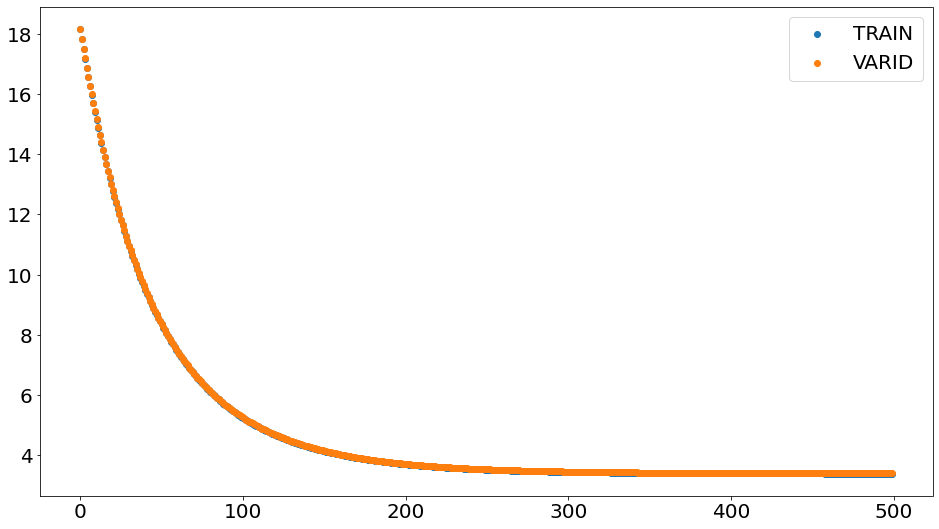

In [1459]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(clf.loss)),clf.loss,label='TRAIN')
plt.scatter(range(len(clf.val_loss)),clf.val_loss,label='VARID')
plt.legend();

### 【問題7】決定領域の可視化
決定領域を可視化してください。

In [1460]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region',
                    xlabel='xlabel',
                    ylabel='ylabel',
                    target_names=['versicolor', 'virginica']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

* スクラッチ実装したモデルで分類

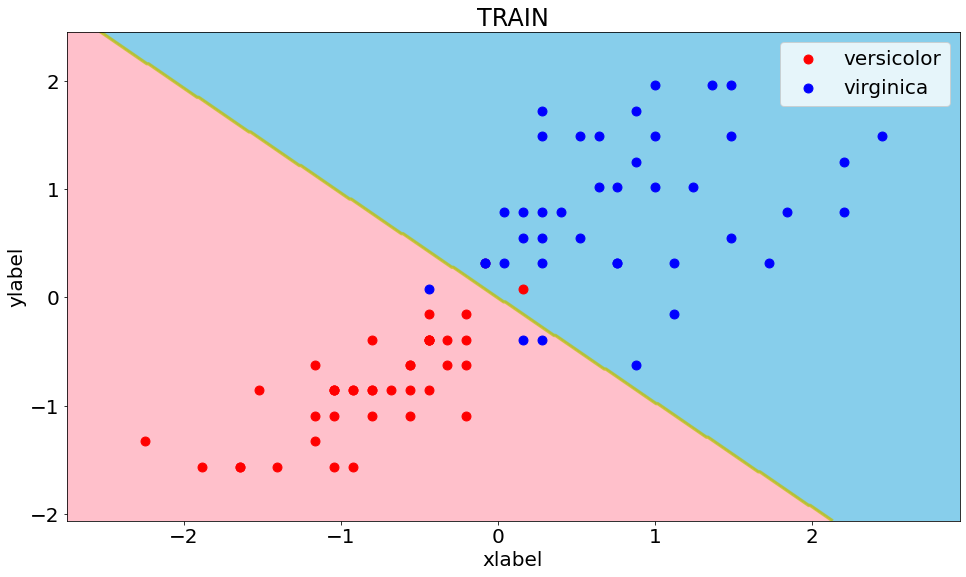

In [1461]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf,title='TRAIN');

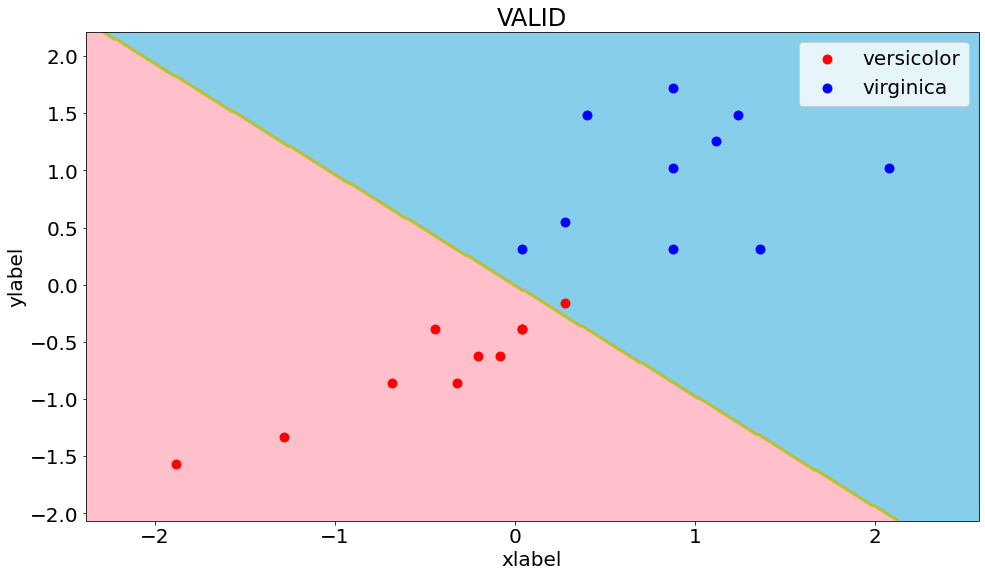

In [1462]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf,title='VALID')

* sklearnのロジスティック回帰で分類

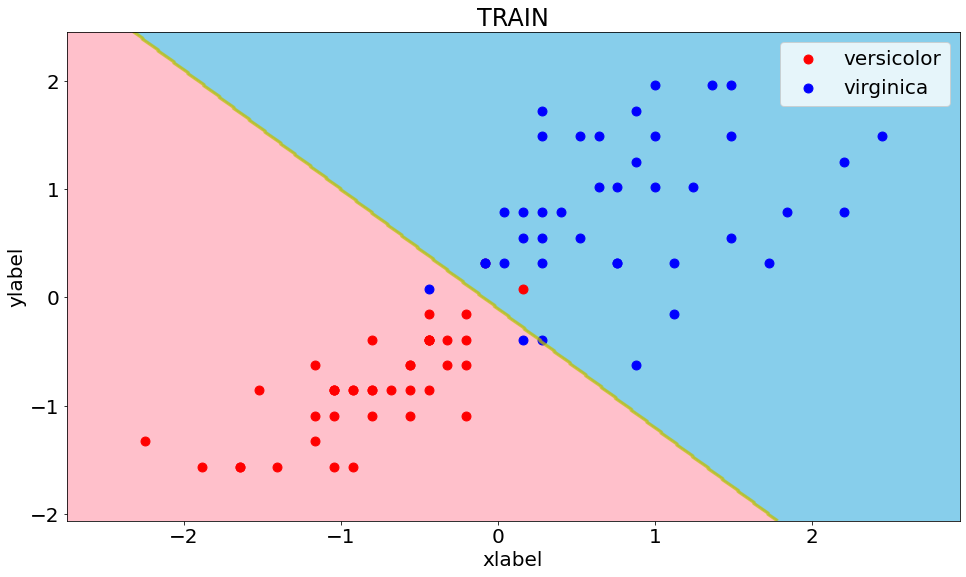

In [1463]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf2,title='TRAIN')

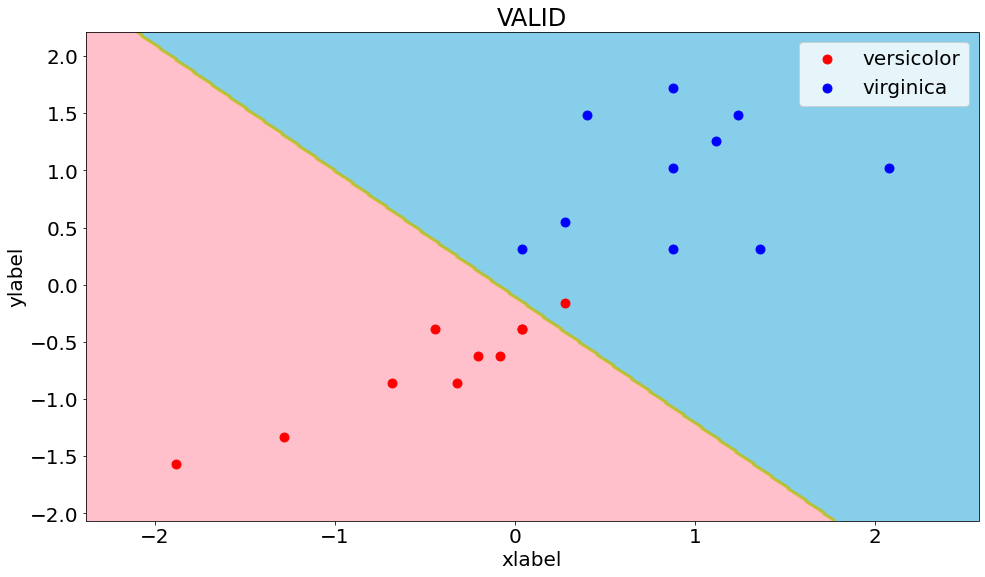

In [1464]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf2,title='VALID')

### 【問題8】（アドバンス課題）重みの保存

In [1465]:
# 学習したθを'theta.npy'に保存する(関数内)
# 学習したθを呼び出す
np.load('theta.npy')

array([0.60202114, 0.23565531, 0.24316062])

### おまけ

Parameter: 0.001
KFold 1 / 4
SUCORE :  0.96
theta: [0.36408405 0.02821562 0.02868683]


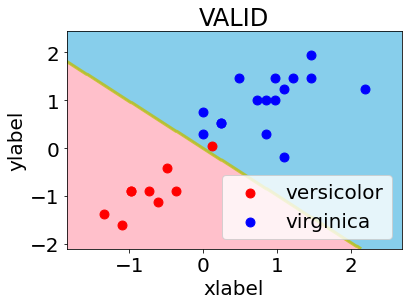

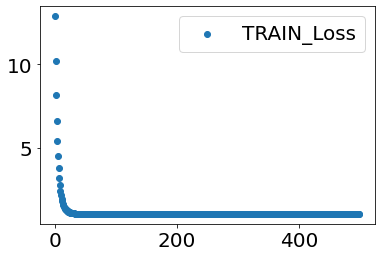

Parameter: 0.001
KFold 2 / 4
SUCORE :  0.96
theta: [0.27437263 0.02925247 0.02960368]


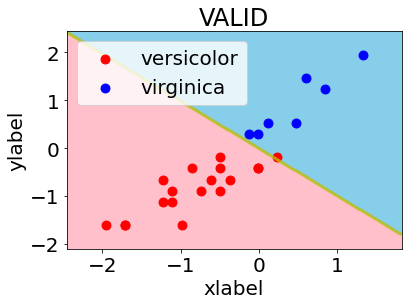

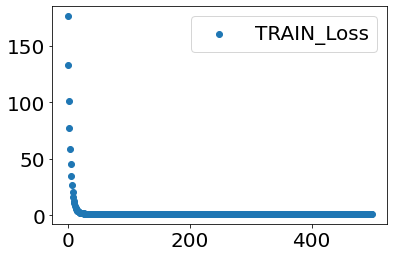

Parameter: 0.001
KFold 3 / 4
SUCORE :  0.96
theta: [0.31729376 0.02924776 0.03099871]


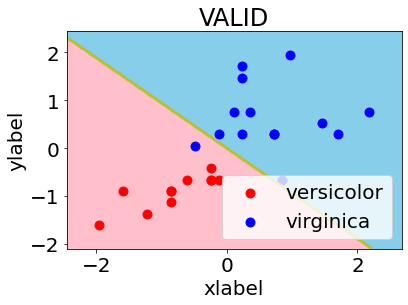

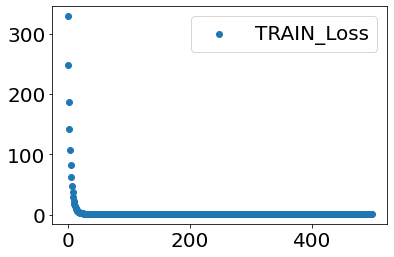

Parameter: 0.001
KFold 4 / 4
SUCORE :  0.88
theta: [0.08970107 0.02725273 0.0309151 ]


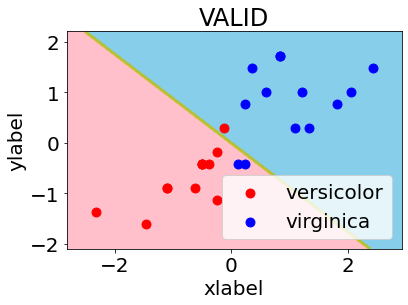

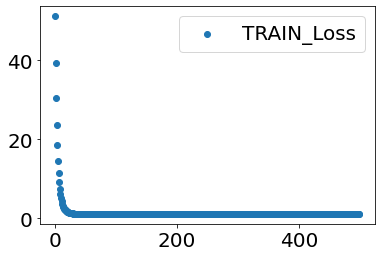

Parameter: 0.01
KFold 1 / 4
SUCORE :  0.92
theta: [0.26581158 0.21849516 0.24326151]


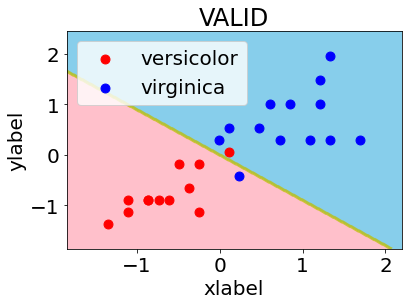

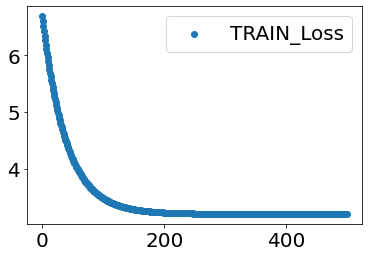

Parameter: 0.01
KFold 2 / 4
SUCORE :  0.88
theta: [0.07096425 0.20905482 0.22748968]


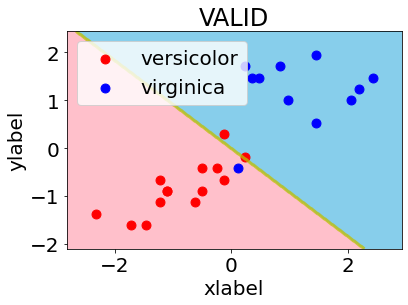

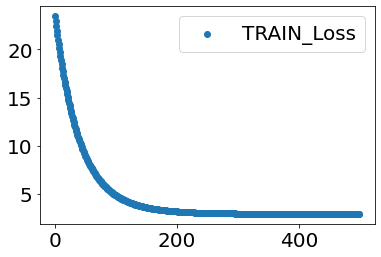

Parameter: 0.01
KFold 3 / 4
SUCORE :  0.96
theta: [0.1999329  0.22594719 0.23632695]


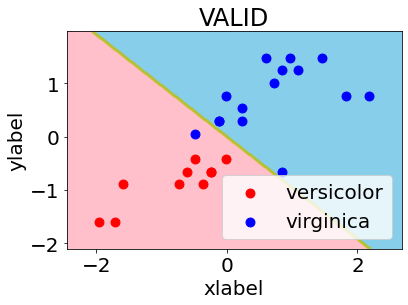

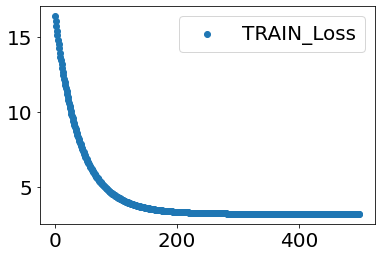

Parameter: 0.01
KFold 4 / 4
SUCORE :  1.0
theta: [0.41838224 0.22537909 0.23219181]


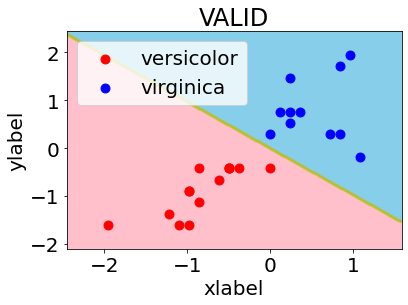

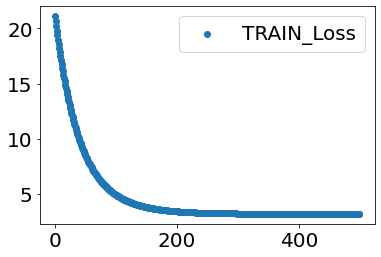

Parameter: 0.1
KFold 1 / 4
SUCORE :  0.96
theta: [0.37954053 0.7910917  0.8613052 ]


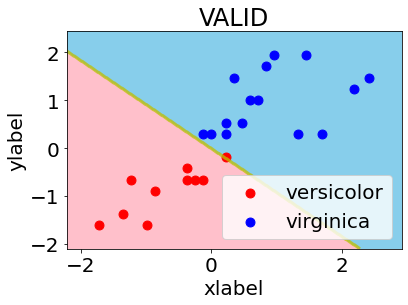

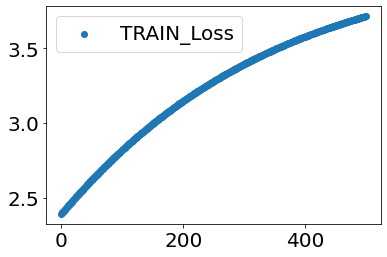

Parameter: 0.1
KFold 2 / 4
SUCORE :  0.96
theta: [0.97830783 0.87567606 0.73101378]


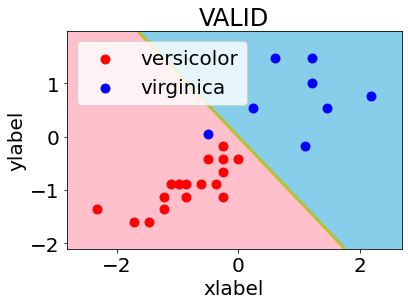

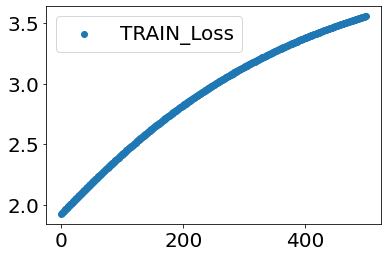

Parameter: 0.1
KFold 3 / 4
SUCORE :  0.92
theta: [0.4810692  0.59035425 1.0106611 ]


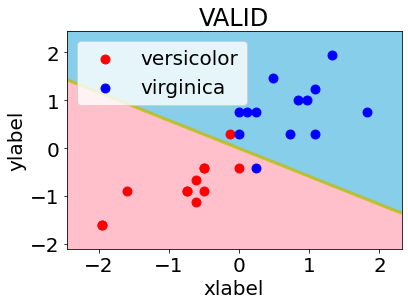

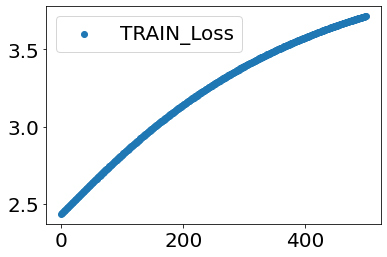

Parameter: 0.1
KFold 4 / 4
SUCORE :  0.88
theta: [0.82535241 0.61875    0.95073835]


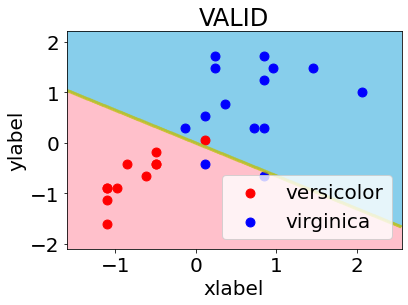

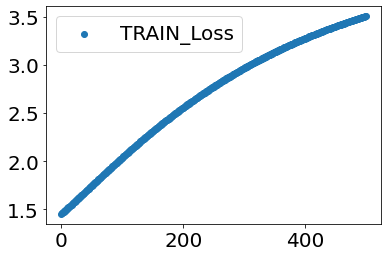

Parameter: 1
KFold 1 / 4
SUCORE :  0.92
theta: [0.86866259 0.97530718 1.02595594]


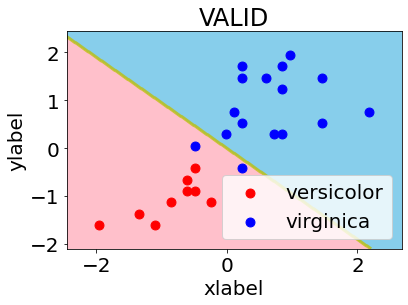

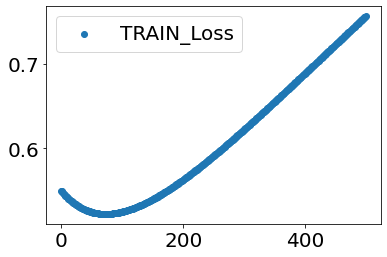

Parameter: 1
KFold 2 / 4
SUCORE :  0.96
theta: [0.65386097 1.12683052 0.94233722]


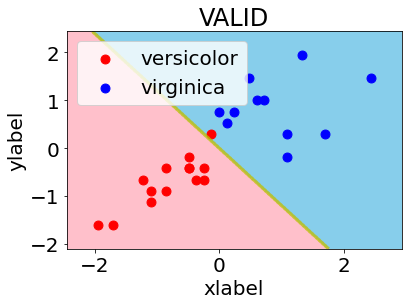

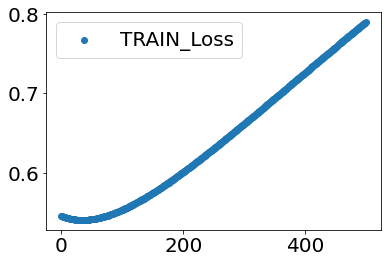

Parameter: 1
KFold 3 / 4
SUCORE :  0.96
theta: [0.41147552 0.98796897 1.14853959]


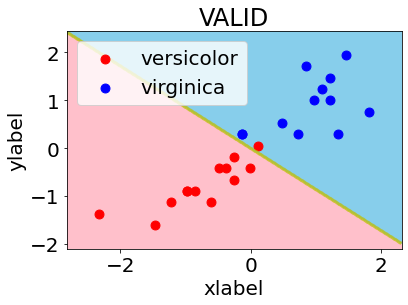

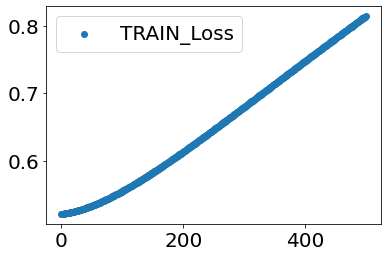

Parameter: 1
KFold 4 / 4
SUCORE :  0.92
theta: [0.77079808 1.34629058 0.81322062]


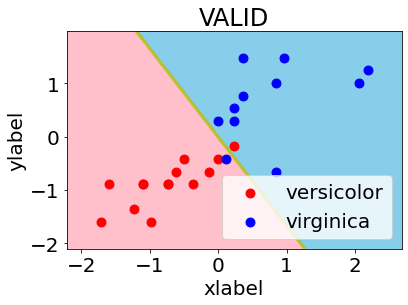

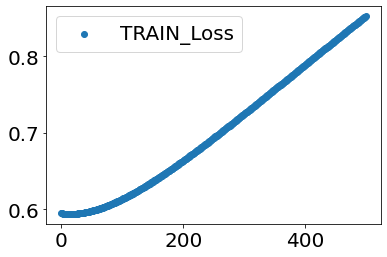

Parameter: 10
KFold 1 / 4
SUCORE :  0.92
theta: [0.89844735 0.84834656 1.28844318]


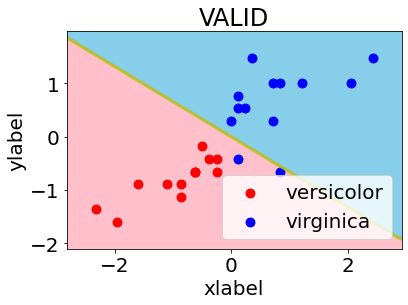

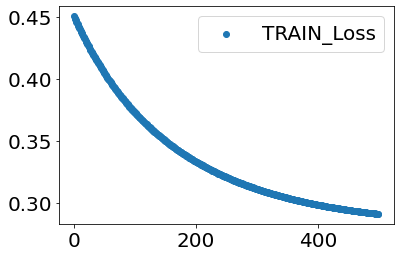

Parameter: 10
KFold 2 / 4
SUCORE :  0.92
theta: [0.00181139 1.38396394 0.85845232]


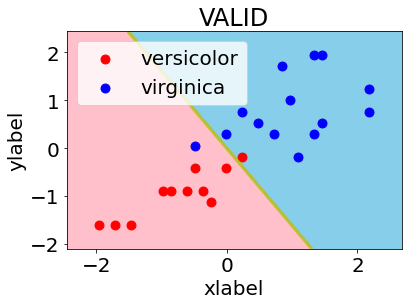

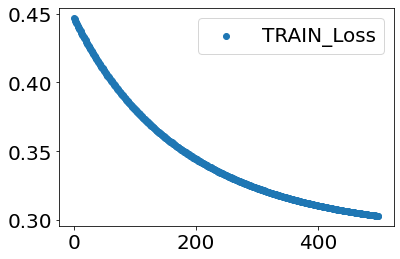

Parameter: 10
KFold 3 / 4
SUCORE :  0.92
theta: [0.5716061  1.18122266 1.20926949]


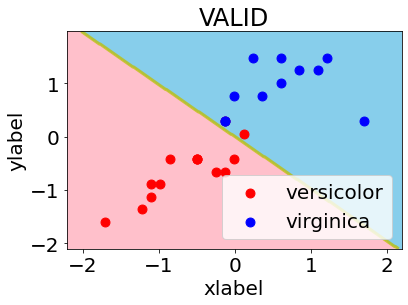

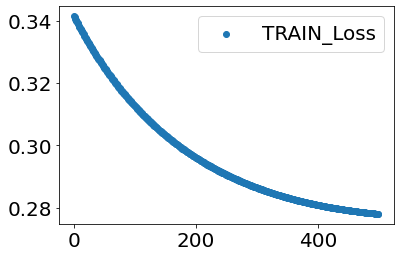

Parameter: 10
KFold 4 / 4
SUCORE :  0.96
theta: [0.86188047 1.23450021 1.09645027]


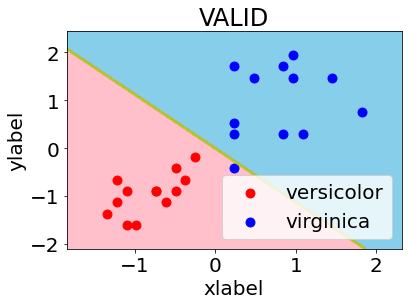

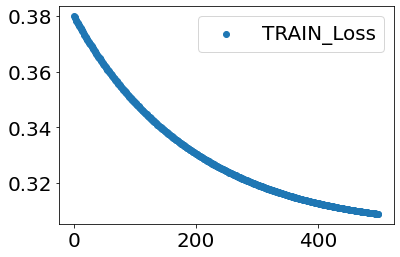

Parameter: 100
KFold 1 / 4
SUCORE :  0.92
theta: [0.71016069 1.08435624 1.46167587]


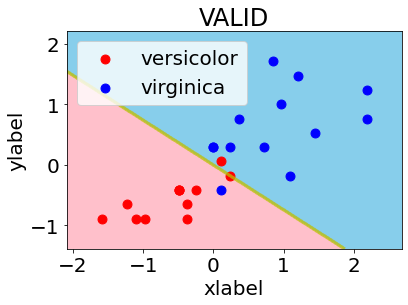

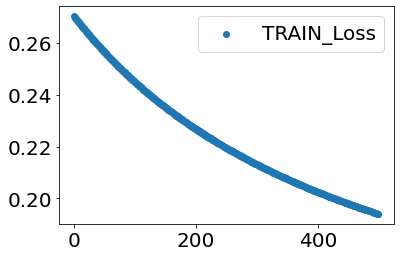

Parameter: 100
KFold 2 / 4
SUCORE :  0.92
theta: [0.52189023 1.09812778 1.12982968]


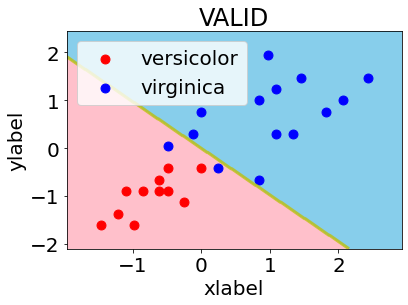

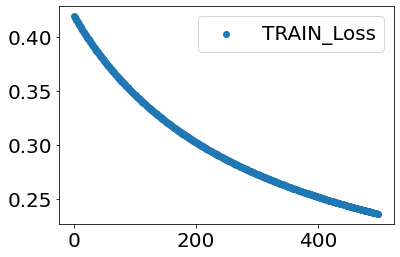

Parameter: 100
KFold 3 / 4
SUCORE :  1.0
theta: [0.86784825 1.0000517  0.89740057]


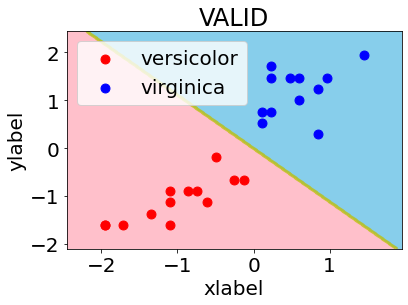

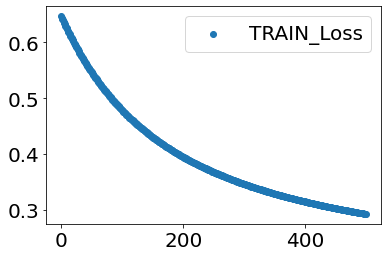

Parameter: 100
KFold 4 / 4
SUCORE :  0.96
theta: [0.91189728 1.35056867 0.95738719]


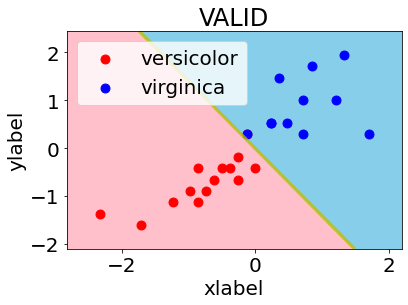

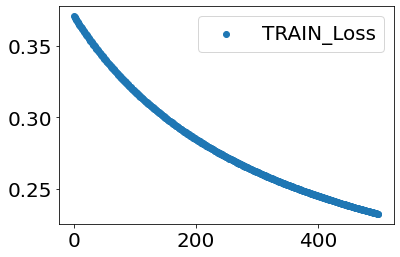

Parameter: 1000
KFold 1 / 4
SUCORE :  1.0
theta: [0.64439307 1.12361928 0.95234267]


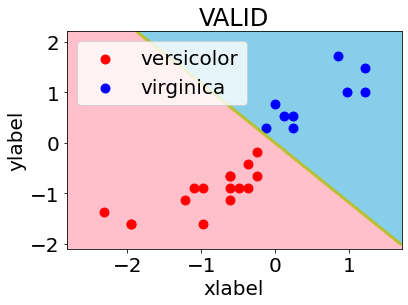

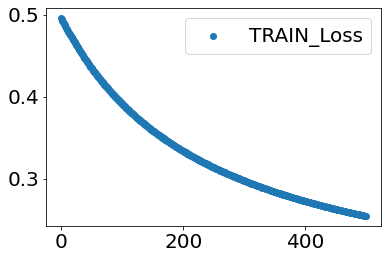

Parameter: 1000
KFold 2 / 4
SUCORE :  0.92
theta: [0.88570909 1.45518871 0.8320296 ]


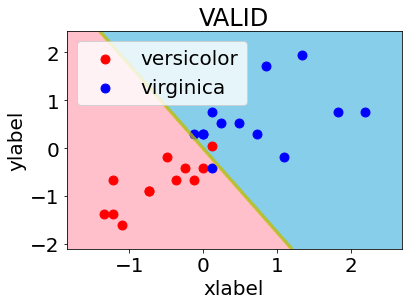

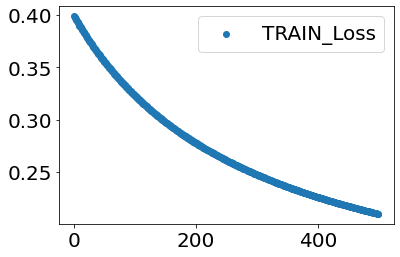

Parameter: 1000
KFold 3 / 4
SUCORE :  0.92
theta: [0.43984624 1.16272043 0.88943963]


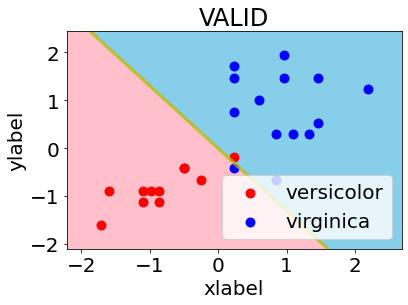

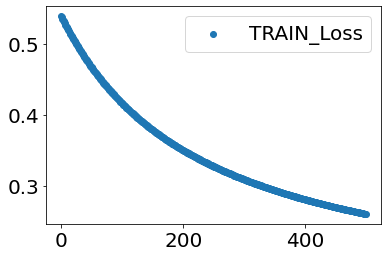

Parameter: 1000
KFold 4 / 4
SUCORE :  0.92
theta: [0.12738847 1.37950461 1.16903369]


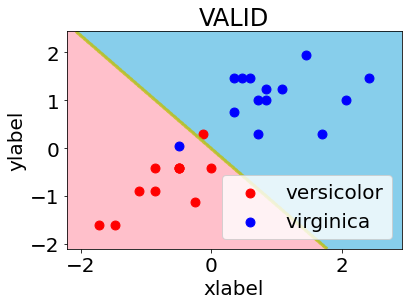

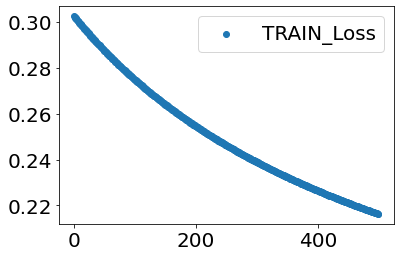

In [1474]:
from sklearn.model_selection import KFold

# データ
X = iris_X
y = iris_y

# 標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 交差検証（クロスバリデーション）
kf = KFold(n_splits=4,random_state=None, shuffle=True)

# パラメータ
parameters = [0.001,0.01,0.1,1,10,100,1000]

for value in parameters:
    # モデル
    model = ScratchLogisticRegression(num_iter=500, C=value)
    
    count = 0
    for train_index, valid_index in kf.split(X):
        count += 1
        print('Parameter:',value)
        print('KFold',count,'/',kf.get_n_splits())
            
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
            
        y_train = y_train.ravel() 
        y_valid = y_valid.ravel() 
            
        # トレインデータでモデル作成
        model.fit(X_train, y_train)
        # 検証データに対して予測
        y_pred = model.predict(X_valid)
         
        # 評価
        score = accuracy_score(y_valid, y_pred)
        print('SUCORE : ',score)
        print('theta:',model.theta)
        
        # decision_region(X_train,y_train,model,title='TRAIN')
        decision_region(X_valid,y_valid,model,title='VALID')
        
        # loss
        plt.scatter(range(len(model.loss)),model.loss,label='TRAIN_Loss')
        plt.legend()
        plt.show()

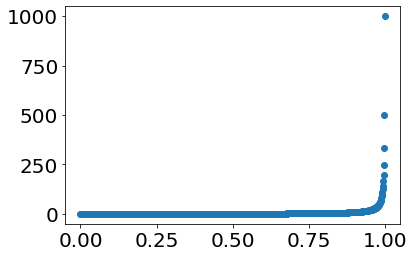

In [1467]:
# オッズ比
p = np.arange(0,1,0.001)
odds_ratio = p/(1-p)
plt.scatter(p,odds_ratio);

In [1468]:
theta = [2,2,2]

In [1469]:
x1 = np.array([2,1,5,6,4,7]).reshape(-1,2)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1],axis=1)

error = np.array([1,0,1])
lamda = np.append(0,np.ones(x.shape[1]-1))*2
lamda

array([0., 2., 2.])

In [1470]:
lamda*theta

array([0., 4., 4.])

In [1471]:
theta -= 0.1*(np.dot(error,x) + lamda*theta)/len(x)
theta

array([1.93333333, 1.66666667, 1.6       ])

In [1472]:
ycheck = np.where(y_train==np.unique(y_train)[0],0,1)
print(np.unique(y_train))
print(np.unique(ycheck))

[1. 2.]
[0 1]


In [1473]:
np.random.rand(2)/10

array([0.01554602, 0.04273865])